In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os



In [2]:
os.chdir('/in')

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
#datx is a dictionary with datasets and their labels
dat1 = unpickle('data_batch_1')
dat2 = unpickle('data_batch_2')
dat3 = unpickle('data_batch_3')
dat4 = unpickle('data_batch_4')
dat5 = unpickle('data_batch_5')

img_dat1 = dat1[b'data']
img_dat2 = dat2[b'data']
img_dat3 = dat3[b'data']
img_dat4 = dat4[b'data']
img_dat5 = dat5[b'data']

label_dat1 = np.array(dat1[b'labels'])
label_dat2 = np.array(dat2[b'labels'])
label_dat3 = np.array(dat3[b'labels'])
label_dat4 = np.array(dat4[b'labels'])
label_dat5 = np.array(dat5[b'labels'])



In [5]:
img_dat_all = np.concatenate((img_dat1, img_dat2, img_dat3, img_dat4, img_dat5))
label_dat_all = np.concatenate((label_dat1, label_dat2, label_dat3, label_dat4, label_dat5))

print(img_dat_all.shape)
print(label_dat_all.shape)

(50000, 3072)
(50000,)


In [8]:
test = unpickle('test_batch')
dat_test = test[b'data']        #10000 rows of 3072 cols px values
label_test = test[b'labels']    #10000 labels for 10k images
label_arr = np.array(label_dat_all)  #converts all label into 1 D array

In [9]:
list_x = []
for i in range(10):
  list_x.append((np.array(np.where(label_arr==i)).shape[1]))

print(list_x)   #no of indices of each class 

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


In [10]:
list_max = []
list_max.append(max(list_x))
list_max.append(list_x.index(max(list_x)))  

class_x = np.ones([10, list_max[0]])*-1

In [11]:
for i in range(10):
  for j in range(np.array(list_x)[i]):
    class_x[i][j] = np.where(label_arr==i)[0][j]    # each row cooresponds to each class number i.e row 0 -> class 0 indices in train array using train label

In [12]:
class_x

array([[2.9000e+01, 3.0000e+01, 3.5000e+01, ..., 4.9941e+04, 4.9992e+04,
        4.9994e+04],
       [4.0000e+00, 5.0000e+00, 3.2000e+01, ..., 4.9993e+04, 4.9998e+04,
        4.9999e+04],
       [6.0000e+00, 1.3000e+01, 1.8000e+01, ..., 4.9987e+04, 4.9991e+04,
        4.9995e+04],
       ...,
       [7.0000e+00, 1.1000e+01, 1.2000e+01, ..., 4.9965e+04, 4.9978e+04,
        4.9986e+04],
       [8.0000e+00, 6.2000e+01, 6.9000e+01, ..., 4.9968e+04, 4.9976e+04,
        4.9985e+04],
       [1.0000e+00, 2.0000e+00, 1.4000e+01, ..., 4.9963e+04, 4.9971e+04,
        4.9997e+04]])

In [13]:
#A 10 x 5 matrix to store all the indices
class_index = np.zeros([10, 5])*-1

In [14]:
# each row of class_index has 5 cols which correspond to 5 images and each row 
# belong sto a diff class e.g row 0 -> class 0

for i in range(10):
  for j in range(5):
    class_index[i][j] = class_x[i][j]

class_index = np.uint8(class_index)
print(class_index)

[[ 29  30  35  49  77]
 [  4   5  32  44  45]
 [  6  13  18  24  41]
 [  9  17  21  26  33]
 [  3  10  20  28  34]
 [ 27  40  51  56  70]
 [  0  19  22  23  25]
 [  7  11  12  37  43]
 [  8  62  69  92 100]
 [  1   2  14  15  16]]


In [15]:
red = np.zeros([32, 32, 50])
green = np.zeros([32, 32, 50])
blue = np.zeros([32, 32, 50])

k_sub = 0
for k in range(10):
  for l in range(5):
    count = 0
    cl = class_index[k][l]
    for i in range(32):
      for j in range(32):
        red[i][j][k_sub] = img_dat1[cl][count]
        green[i][j][k_sub] = img_dat1[cl][count+1024]
        blue[i][j][k_sub] = img_dat1[cl][count+1024+1024]
        count+=1
    k_sub+=1        #k_sub goes till 50 basically a counter for filling 50 data in rgb values

In [16]:
#for visualizing 50 images, 5 from eachh class
rgb_all = np.zeros([50, 32, 32, 3])
for i in range(50):
  rgb_all[i, :, :, 0] =  red[:, :, i]/255
  rgb_all[i, :, :, 1] =  green[:, :, i]/255
  rgb_all[i, :, :, 2] =  blue[:, :, i]/255


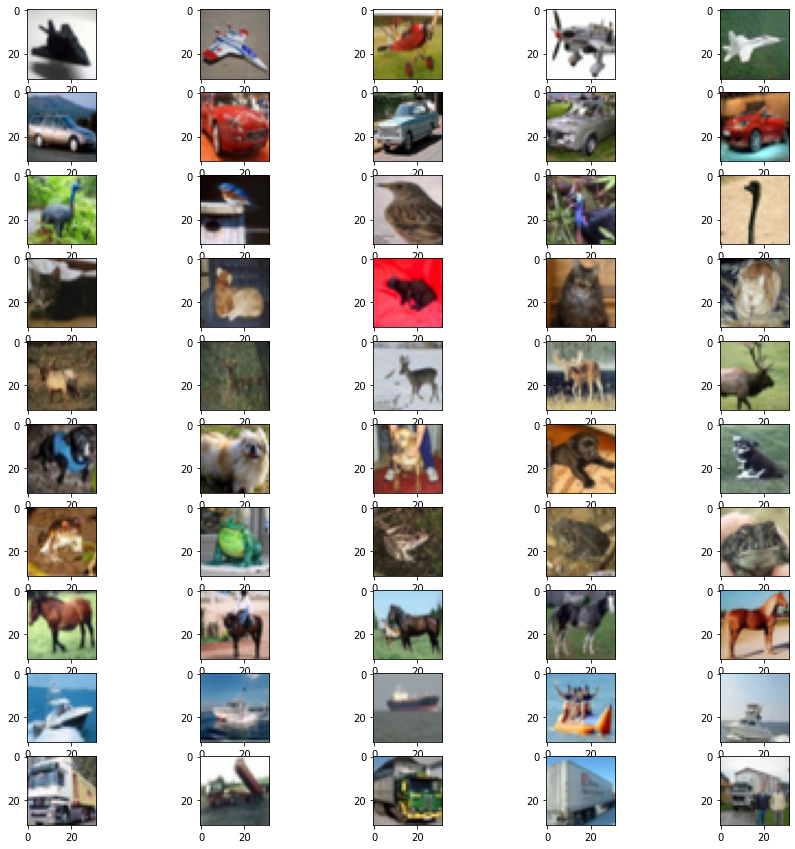

In [22]:
fig = plt.figure(figsize=(15, 15))
for i in range(1, 51):
    fig.add_subplot(10, 5, i)
    plt.imshow(rgb_all[i-1, :, :, :])
plt.show()

# rgb_all: 1st col is 50 i.e 50 total values where 0-4:0th class, 5-9:1st class
# rgb_all: 2nd col is 32 px
# rgb_all: 3rd col is 32 px
# rgb_all: 4th col is 3 values i.e red, green, blue

In [23]:
X_train = img_dat_all 
X_test = dat_test
y_train = label_dat_all

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf = LDA()
clf.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [25]:
pred = clf.predict(X_test)
print("predictions: ", pred)

predictions:  [3 9 8 ... 3 5 4]


In [26]:
from sklearn.metrics import accuracy_score
score_lda= accuracy_score(label_test, pred) * 100
print("Overall accuracy: ", score_lda)

Overall accuracy:  37.13


In [27]:
def get_classwise_acc(test_label, pred_FDA):
  clx_count = np.zeros([1, 10])
  clx_acc = np.zeros([1, 10])

  for j in range(10):
    for i in range(len(test_label)):
      if(test_label[i]==j and pred_FDA[i]==j):
        clx_count[0][j]+=1
    clx_acc[0][j] = (clx_count[0][j]/np.where(test_label==j)[0].shape[0])*100

  print("Class-wise accuracy: ")
  for i in range(10):
    print("Class", i, "accuracy: ", clx_acc[0][i], "%")

In [29]:
label_test_arr = np.array(label_test)
acc_all = get_classwise_acc(label_test_arr, pred)

Class-wise accuracy: 
Class 0 accuracy:  46.300000000000004 %
Class 1 accuracy:  41.5 %
Class 2 accuracy:  25.5 %
Class 3 accuracy:  24.5 %
Class 4 accuracy:  27.1 %
Class 5 accuracy:  32.9 %
Class 6 accuracy:  41.3 %
Class 7 accuracy:  40.400000000000006 %
Class 8 accuracy:  49.4 %
Class 9 accuracy:  42.4 %
